# Interactive Learning Digit Recogonizer

This project shows how to make a number recognizer using a neural network that was built from scratch with numpy. The interactive learning module is one of the best parts of this project. It lets users draw their own numbers and check the model's estimates. If the model's guess is wrong, it uses what the user types as an example to get better at recogonizing the digit.

***
## Libraries Used
1. Numpy
2. Matplotlib
3. OpenCV
4. Scitkit-Learn

***

## Neural Network

<center><img src="Neural_Net.png"/></center>

***

## Dataset Used

https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer

***
## References

The neural network in this project was inspired by [Samson Zhang's video](https://www.youtube.com/watch?v=w8yWXqWQYmU&pp=ygUbbmV1cmFsIG5ldHdvcmsgZnJvbSBzY3JhdGNo), where he beautifully explains the concepts and demonstrates the code. While the dataset remains the same, this repository presents my own interpretation and implementation of the model.

***
## Code

Below is the necessary math and code to implement the math for the model

### Importing the necessary libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from utils import load_data
import os

### Loading the dataset

In [3]:
X_train, X_test, Y_train, Y_test = load_data()

In [4]:
print(f'Shape of training input: {X_train.shape}')
print(f'Shape of training output: {Y_train.shape}')
print(f'Shape of testing input: {X_test.shape}')
print(f'Shape of testing output: {Y_test.shape}')

Shape of training input: (37800, 784)
Shape of training output: (37800,)
Shape of testing input: (4200, 784)
Shape of testing output: (4200,)


### Defining activation functions of the layers

$
    \sigma = \text{ReLU function} \\
    g = \text{Softmax function}
$
$$\begin{align}
    \sigma(Z) &= 
    \begin{cases} 
        Z & \text{if } Z > 0 \\
        0 & \text{if } Z \leq 0 
    \end{cases}\\
    g(Z_i) &= \dfrac{e^{Z_i}}{\sum e^{Z_j}}
\end{align}$$

In [4]:
# defining activation functions
def ReLU(z):  # sigma
    return np.maximum(0, z)

def softmax(z):  # g
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

### One hot function

The function `label_conversion()` converts the labels given in the dataset into vectors corresponding to the softmax output.

In [5]:
# converting label into softmax labels
def label_conversion(y):
    y_converted = np.zeros((y.size, y.max() + 1))
    y_converted[np.arange(y.size), y] = 1
    return y_converted

### Initializing the parameters
$
    \text{Hidden Layer 1:}
$
    $$ \begin{align}
        \text{Dimension of }W^{[1]} &= (784 \times 128) \\
        \text{Dimension of }b^{[1]} &= (1 \times 128) \\
    \end{align}$$
$
    \text{Hidden Layer 2:}
$
    $$\begin{align}
        \text{Dimension of }W^{[2]} &= (128 \times 64) \\
        \text{Dimension of }b^{[2]} &= (1 \times 64) \\
    \end{align}$$
$
    \text{Output Layer:}
$
    $$\begin{align}
        \text{Dimension of }W^{[3]} &= (64 \times 10) \\
        \text{Dimension of }b^{[3]} &= (1 \times 10) \\
    \end{align}$$

In [6]:
# defining a function to initialize parameters to initialize parameters
def init_params():
    W1 = np.random.randn(784, 128) * np.sqrt(2. / 784)
    b1 = np.zeros((1, 128))
    W2 = np.random.randn(128, 64) * np.sqrt(2. / 128)
    b2 = np.zeros((1, 64))
    W3 = np.random.randn(64, 10) * np.sqrt(2. / 64)
    b3 = np.zeros((1, 10))
    return W1, b1, W2, b2, W3, b3

### Function to calculate loss

Loss function uses cross entropy loss function

$$
    \text{Loss} = \sum y_{i} log(A^{[3]}_i)
$$

In [7]:
# defining a function to calculate the cost
def calculate_cost(A3, Y):
    m = Y.shape[0]
    Y_one_hot = label_conversion(Y)
    epsilon = 1e-15
    A3 = np.clip(A3, epsilon, 1 - epsilon)
    log_probs = -np.sum(Y_one_hot * np.log(A3)) / m
    return log_probs

### Function to get the prediction and the accuracy of the model

In [8]:
def get_prediction(A3):
    return np.argmax(A3, axis=1)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y) * 100

### Defining forward propagation
$
    \text{Hidden Layer 1:} \\
$
    $$\begin{align}
        Z^{[1]} &= X \cdot W^{[1]} + b^{[1]} \\
        A^{[1]} &= \sigma(Z^{[1]}) \\
    \end{align}$$
$
    \text{Hidden Layer 2:} \\
$
    $$\begin{align}
        Z^{[2]} &= A^{[1]} \cdot W^{[2]} + b^{[2]} \\
        A^{[2]} &= \sigma(Z^{[2]}) \\
    \end{align}$$
$
    \text{Output Layer:} \\
$
    $$\begin{align}
        Z^{[3]} &= A^{[2]} \cdot W^{[3]} + b^{[3]} \\
        A^{[3]} &= g(Z^{[3]})
    \end{align}$$

In [9]:
# defining forward propagation
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = np.dot(X, W1) + b1  # (m, 784) . (784, 128) + (1, 128) = (m, 128)
    A1 = ReLU(Z1)   
    Z2 = np.dot(A1, W2) + b2  # (m, 128) . (128, 64) + (1, 64) = (m, 64)
    A2 = ReLU(Z2)
    Z3 = np.dot(A2, W3) + b3  # (m, 64) . (64, 10) + (1, 10) = (m, 10)
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

### Defining derivative of activation functions

$
    \text{Derivative of ReLU} = \sigma '
$
$$\begin{align}
    \sigma '(Z) = 
    \begin{cases}
        1 & \text{if } Z > 0\\
        0 & \text{if } Z \leq 0
    \end{cases}
\end{align}$$

In [10]:
# defining derivative functions
def deriv_ReLU(Z):
    return Z > 0

### Defining Back Propagation for Gradient descent
$
    \text{Note: T denotes Transpose, m denotes the number of training examples} \\
    \text{ } \\
    \text{Output Layer:} \\
$
    $$\begin{align}
        dZ^{[3]} &= A^{[3]} - Y \\
        dW^{[3]} &= \frac{1}{m} \times ( A^{[2] T} \cdot dZ^{[3]} ) \\
        db^{[3]} &= \frac1m \times \sum dZ^{[3]}_i \\
    \end{align}$$
$
    \text{ } \\
    \text{Hidden Layer 2:} \\
$
    $$\begin{align}
        dZ^{[2]} &= ( dZ^{[2]} \cdot W^{[3] T}) \times \sigma ' (Z^{[2]} ) \\
        dW^{[2]} &= \frac{1}{m} \times ( A^{[1] T} \cdot dZ^{[2]} ) \\
        db^{[2]} &= \frac1m \times \sum dZ^{[2]}_i \\
    \end{align}$$
$
    \text{ } \\
    \text{Hidden Layer 1:} \\
$
    $$\begin{align}
        dZ^{[1]} &= ( dZ^{[2]} \cdot W^{[2] T} ) \times \sigma ' (Z^{[1]}) \\
        dW^{[1]} &= \frac{1}{m} \times ( X^{T} \cdot dZ^{[1]} ) \\
        db^{[1]} &= \frac1m \times \sum dZ^{[1]}_i \\
    \end{align}$$

In [11]:
# defining backwards propagation
def backward_prop(Z1, Z2, A1, A2, A3, W3, W2, X, Y):
    y_labelled = label_conversion(Y)
    m = Y.size

    dZ3 = A3 - y_labelled
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dZ2 = np.dot(dZ3, W3.T) * deriv_ReLU(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dZ1 = np.dot(dZ2, W2.T) * deriv_ReLU(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2, dW3, db3

### Function to update the parameters based on learning rate

$
    \text{Hidden Layer 1:}
$
$$\begin{align}
    W^{[1]} &= W^{[1]} - \alpha \times dW^{[1]} \\
    b^{[1]} &= b^{[1]} - \alpha \times db^{[1]}
\end{align}$$
$
    \text{Hidden Layer 2:}
$
$$\begin{align}
    W^{[2]} &= W^{[2]} - \alpha \times dW^{[2]} \\
    b^{[2]} &= b^{[2]} - \alpha \times db^{[2]}
\end{align}$$
$
    \text{Output Layer:}
$
$$\begin{align}
    W^{[3]} &= W^{[3]} - \alpha \times dW^{[3]} \\
    b^{[3]} &= b^{[3]} - \alpha \times db^{[3]}
\end{align}$$

In [12]:
# defining a function to update the parameters
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    return W1, b1, W2, b2, W3, b3

### Function to run gradient descent

Runs the actual gradient descent allowing the neural network to learn over the training examples and produce the adjusted values of weights and bias.

In [13]:
# defining gradient descent
def gradient_descent(alpha, iterations, X, Y):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations + 1):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, Z2, A1, A2, A3, W3, W2, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        # log a few results
        if (i % 10 == 0 or i == iterations):  # Log every 10 iterations
            cost = calculate_cost(A3, Y) 
            predictions = get_prediction(A3)
            accuracy = get_accuracy(predictions, Y)
            print(f'Iteration: {i} ; Cost: {cost:.2f} ; Accuracy: {accuracy:.2f}')  # Log cost and accuracy
    return W1, b1, W2, b2, W3, b3

### Running the model

$
    \text{Setting the values of constants}
$
$$\begin{align}
    \alpha &= 0.1 \\
    \text{Iterations} &= 1000
\end{align}$$

In [14]:
# running the actual model
W1, b1, W2, b2, W3, b3 = gradient_descent(0.1, 1000, X_train / 255.0, Y_train) # passing a normalized dataset

Iteration: 0 ; Cost: 2.43 ; Accuracy: 6.93
Iteration: 10 ; Cost: 1.66 ; Accuracy: 61.96
Iteration: 20 ; Cost: 1.08 ; Accuracy: 75.98
Iteration: 30 ; Cost: 0.77 ; Accuracy: 81.74
Iteration: 40 ; Cost: 0.63 ; Accuracy: 84.34
Iteration: 50 ; Cost: 0.55 ; Accuracy: 85.97
Iteration: 60 ; Cost: 0.49 ; Accuracy: 86.97
Iteration: 70 ; Cost: 0.46 ; Accuracy: 87.76
Iteration: 80 ; Cost: 0.43 ; Accuracy: 88.38
Iteration: 90 ; Cost: 0.41 ; Accuracy: 88.78
Iteration: 100 ; Cost: 0.39 ; Accuracy: 89.25
Iteration: 110 ; Cost: 0.37 ; Accuracy: 89.60
Iteration: 120 ; Cost: 0.36 ; Accuracy: 89.86
Iteration: 130 ; Cost: 0.35 ; Accuracy: 90.12
Iteration: 140 ; Cost: 0.34 ; Accuracy: 90.34
Iteration: 150 ; Cost: 0.33 ; Accuracy: 90.52
Iteration: 160 ; Cost: 0.32 ; Accuracy: 90.72
Iteration: 170 ; Cost: 0.32 ; Accuracy: 90.88
Iteration: 180 ; Cost: 0.31 ; Accuracy: 91.04
Iteration: 190 ; Cost: 0.30 ; Accuracy: 91.21
Iteration: 200 ; Cost: 0.30 ; Accuracy: 91.36
Iteration: 210 ; Cost: 0.29 ; Accuracy: 91.51


### Function to make predictions

In [15]:
# defining a function to make predictions
def make_predictions(W1, b1, W2, b2, W3, b3, X):
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    return A3

### Making predictions in order to test the accuracy of the model

In [16]:
predictions = make_predictions(W1, b1, W2, b2, W3, b3, X_test)
accuracy = get_accuracy(get_prediction(predictions), Y_test)
print(f'Accuracy of the model: {accuracy:.2f}')

Accuracy of the model: 94.43


### Function to save the params

In [23]:
# Define a function to save the model parameters
def save_params(W1, b1, W2, b2, W3, b3, filename_prefix):
    # Ensure the directory exists
    if not os.path.exists('weights'):
        os.makedirs('weights')

    # Save the parameters to the specified directory
    np.save(os.path.join('weights', f'{filename_prefix}_W1.npy'), W1)
    np.save(os.path.join('weights', f'{filename_prefix}_b1.npy'), b1)
    np.save(os.path.join('weights', f'{filename_prefix}_W2.npy'), W2)
    np.save(os.path.join('weights', f'{filename_prefix}_b2.npy'), b2)
    np.save(os.path.join('weights', f'{filename_prefix}_W3.npy'), W3)
    np.save(os.path.join('weights', f'{filename_prefix}_b3.npy'), b3)

In [24]:
save_params(W1, b1, W2, b2, W3, b3, 'model_weights')

### Function to check the model's accuracy

We can see how the test performs on each test dataset

In [32]:
def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_test[index, :, None]
    prediction = make_predictions(W1, b1, W2, b2, W3, b3, X_test[index, :, None].T)
    label = Y_test[index]
    print("Prediction: ", np.argmax(prediction))
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Set the value of `index` to manually see how the model performs in the testing dataset.

Prediction:  2
Label:  2


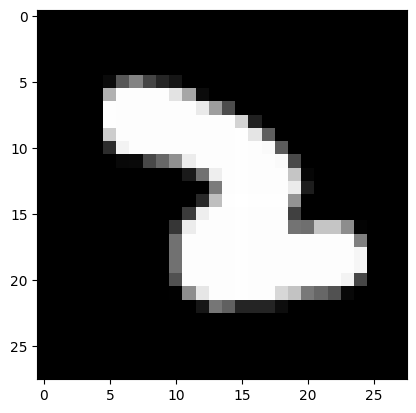

In [36]:
test_prediction(7, W1, b1, W2, b2, W3, b3)